# Task 2.14: Regression
## Ridge Regression with Cross Validation

In this notebook we are going to  tune the hyper-parameter associated with ridge regression using cross-validation procedures. You will be provided with some already complete code as well as some code that you should complete yourself. In particular, you will have to:

* Complete the function `ridgeRegrCV(X_train, y_train, alpha,X_test)` that will make use of the pre-built implementation of Ridge regression with cross validation to select the best L2-penalty. Experiment with different cross validation methods.



# Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Load the data
The data we are using is from Boston house-prices dataset, which we can access directly from the scikit learn library . It consists of 506 data points and 13 features.

In [2]:
#add another column that contains the house prices which in scikit learn datasets are considered as target
boston=load_boston() # get the data
#print(boston.keys()) # boston variable itself is a dictionary, so we can check for its keys 
print(boston.data.shape) # shape of data
#print(boston.feature_names)
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names) # convert the boston.data to a a dataframe
boston_df['Price']=boston.target # there is no column called ‘PRICE’ in the data frame because the target column is available in another attribute called target
newX=boston_df.drop('Price',axis=1) # All other features
newY=boston_df['Price'] # Boston Housing Price
boston_df.head()


(506, 13)


/Users/william.devena/.conda/envs/ML/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(len(y_train)/len(newX),2),
                                                       round(len(y_test)/len(newX),2)))


train set: 0.7  | test set: 0.3


# Cross-validation for selecting the ridge regressor hyper-parameter

`Ridge()` function from scikit-learn library has a hyper-parameter **alpha**  (we also refer to this hyper-parameter as λ) that is used to tune the model. Instead of choosing alpha manually, it is better to use cross-validation to optimize the selection of the hyper-parameter.

Each alpha corresponds to a vector of thirteen ridge regression coefficients. We will create a 13×5 matrix to store the various combinations of hyper parameters and associated ridge regression coefficients (13 rows for our 13 predictors and 5 columns for our 5 generated alphas). You can of course change the number of generated alphas.


In [4]:
# generate a range of alpha values and put them in a numpy array
#r_alphas = 10**np.linspace(10,-2,100)*0.5
r_alphas = [0.001, 0.01, 0.1, 1, 10]
#print(r_alphas)



 Make use of `RidgeCV()`, which is the cross-validated `Ridge()` function from scikit-learn.

In [11]:
def ridgeRegrCVPredict(X_train, y_train, r_alphas, X_test):

    ridgecv = RidgeCV(alphas = r_alphas, fit_intercept=True)
    ridgecv.fit(X_train, y_train)

    # Next step: fit ridgecv!
    print('Best alpha value: '+str(ridgecv.alpha_))

    Y_pred_cv = ridgecv.predict(X_test)
    return Y_pred_cv


In [12]:
ridgeRegrCVPredict(X_train, y_train, r_alphas,X_test)

Best alpha value: 0.1


array([ 3.79951652e+01,  1.93526477e+01,  2.34986075e+01,  3.24357468e+01,
        2.48885592e+01,  2.30819739e+01,  1.99971511e+01,  6.01905811e+00,
        2.10956926e+01,  1.74722218e+01,  1.21427819e+01,  3.24137186e+01,
        3.62577259e+01,  3.07470939e+01,  6.86137619e+00,  1.08697830e+01,
        2.34849184e+01,  1.50982283e+01,  1.29063430e+01,  2.94949039e+01,
        2.77247908e+01,  3.60085127e+01,  2.71118553e+01,  2.33773940e+01,
        1.39889844e+01,  2.49402623e+01,  2.07690564e+01,  1.78074439e+01,
        2.00068302e+01,  2.41592775e+01,  1.49728937e+01,  3.41190425e+01,
        2.21263682e+01,  1.91169850e+01,  1.85402348e+01,  1.77638702e+01,
        2.20518620e+01,  3.27520243e+01,  1.65827841e+01,  2.23239531e+01,
        1.74271113e+01,  1.04636846e+01,  2.49827485e+01,  1.79661225e+01,
        2.55102527e+01,  2.60271329e+01,  2.61424688e+01,  1.73613270e+01,
        2.84032063e+01,  2.06393592e+01,  2.38854372e+01,  2.02815484e+01,
        3.80950861e+01,  

Test your results:

Best alpha value: 0.1
Mean Squared Error (MSE) on test set (built-in cross-validation): 22.56321375078558


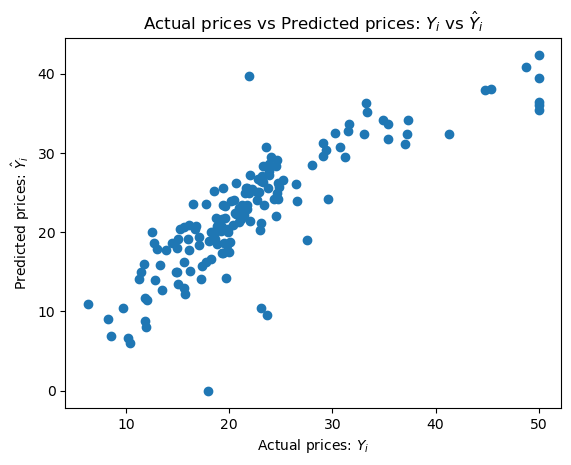

In [13]:
Y_pred_cv =  ridgeRegrCVPredict(X_train, y_train, r_alphas,X_test)
mse_cv=mean_squared_error(y_test,Y_pred_cv)
print('Mean Squared Error (MSE) on test set (built-in cross-validation): '+str(mse_cv))

plt.scatter(y_test, Y_pred_cv)
plt.xlabel("Actual prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
